# Criando os Nomes

In [81]:
import pandas as pd

In [82]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [83]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
121,LIVIA,0,135979,122,F
191,TERESA,0,83045,192,F
92,VALERIA,0,183943,93,F
123,IVONE,0,131256,124,F
53,ELAINE,0,256433,54,F


In [84]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
165,ISAIAS,0,78418,166,M
71,BENEDITO,0,213323,72,M
115,MILTON,0,125669,116,M
117,WAGNER,0,124863,118,M
150,EDMILSON,0,93251,151,M


In [85]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [86]:
frames = [nomes_f, nomes_m]

In [87]:
nomes = pd.concat(frames)["nome"].to_frame()
nomes.sample(5)

,nome
193,KAUAN
187,NAIARA
134,VERONICA
59,ISABEL
51,JOANA


# Incluindo ID dos alunos

In [88]:
import numpy as np

In [89]:
np.random.seed(123)

In [90]:
total_alunos = len(nomes)
total_alunos

400

In [91]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [92]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [93]:
dominios = ["@dominiodoemail.com.br", "@servicodoemail.com"]
nomes["dominio"] = np.random.choice(dominios, total_alunos)

In [94]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [95]:
nomes["email"] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [96]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela de Cursos

In [97]:
# !pip3 install html5lib
# !pip3 install lxml

In [98]:
import html5lib

In [99]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [100]:
type(cursos)

list

In [101]:
cursos = cursos[0]

In [102]:
type(cursos)

pandas.core.frame.DataFrame

In [103]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [104]:
cursos = cursos.rename(columns = {"Nome do curso" : "nome_do_curso"})

In [105]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [106]:
cursos["id"] = cursos.index + 1

In [107]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [108]:
cursos = cursos.set_index("id")

In [109]:
cursos.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [115]:
nomes.sample(5)

,nome,id_aluno,dominio,email
193,KAUAN,84,@servicodoemail.com,kauan@servicodoemail.com
188,POLIANA,369,@servicodoemail.com,poliana@servicodoemail.com
71,BENEDITO,258,@dominiodoemail.com.br,benedito@dominiodoemail.com.br
99,DENISE,39,@servicodoemail.com,denise@servicodoemail.com
79,MONICA,329,@dominiodoemail.com.br,monica@dominiodoemail.com.br


In [120]:
nomes["matriculas"] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [123]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
186,INES,319,@servicodoemail.com,ines@servicodoemail.com,1
58,ALESSANDRA,193,@servicodoemail.com,alessandra@servicodoemail.com,2
193,LUCILENE,146,@dominiodoemail.com.br,lucilene@dominiodoemail.com.br,1
151,SEVERINA,5,@dominiodoemail.com.br,severina@dominiodoemail.com.br,6
63,ERICA,228,@servicodoemail.com,erica@servicodoemail.com,2


In [124]:
nomes.matriculas.describe()

count    400.000000
mean       2.005000
std        1.503538
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       14.000000
Name: matriculas, dtype: float64

In [125]:
import seaborn as sns

Matplotlib created a temporary config/cache directory at C:\Users\lieds\AppData\Local\Temp\matplotlib-wm6ly6rn because the default path (C:\Users\lieds\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


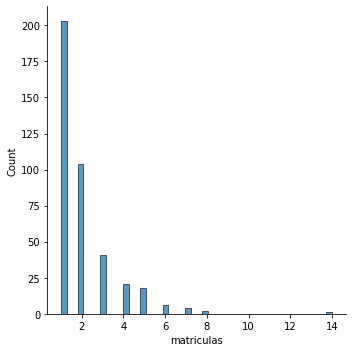

In [126]:
sns.displot(nomes.matriculas)

In [127]:
nomes.matriculas.value_counts()

1     203
2     104
3      41
4      21
5      18
6       6
7       4
8       2
14      1
Name: matriculas, dtype: int64

In [130]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
176,CELIO,388,@servicodoemail.com,celio@servicodoemail.com,1
117,WAGNER,140,@servicodoemail.com,wagner@servicodoemail.com,2
17,LUCIANA,163,@dominiodoemail.com.br,luciana@dominiodoemail.com.br,1
187,ELTON,97,@dominiodoemail.com.br,elton@dominiodoemail.com.br,1
126,SEBASTIANA,30,@dominiodoemail.com.br,sebastiana@dominiodoemail.com.br,1


# Selecionando Cursos

In [133]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
153,CAUA,77,@dominiodoemail.com.br,caua@dominiodoemail.com.br,3
135,RUBENS,256,@dominiodoemail.com.br,rubens@dominiodoemail.com.br,7
52,SAMUEL,220,@dominiodoemail.com.br,samuel@dominiodoemail.com.br,1


In [134]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [135]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ["id_aluno", "id_curso"])

In [139]:
matriculas.head()

,id_aluno,id_curso
0,235,16
1,43,14
2,43,17
3,304,9
4,156,9


In [141]:
matriculas.groupby("id_curso").count().join(cursos["nome_do_curso"]).rename(columns = {"id_aluno" : "quantidade_de_alunos"})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,19,Lógica de programação
2,40,Java para Web
3,28,C# para Web
4,26,Ruby on Rails
5,37,Cursos de Python
6,15,PHP com MySql
7,41,.NET para web
8,37,Novas integrações com Java
9,66,TDD com Java


In [142]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,3
139,MARGARIDA,54,@dominiodoemail.com.br,margarida@dominiodoemail.com.br,1
26,GUSTAVO,86,@servicodoemail.com,gustavo@servicodoemail.com,2


In [143]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [144]:
matriculas.head()

,id_aluno,id_curso
0,235,16
1,43,14
2,43,17
3,304,9
4,156,9


In [145]:
matriculas_por_curso = matriculas.groupby("id_curso").count().join(cursos["nome_do_curso"]).rename(columns = {"id_aluno" : "quantidade_de_alunos"})

In [147]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,19,Lógica de programação
2,40,Java para Web
3,28,C# para Web
4,26,Ruby on Rails
5,37,Cursos de Python


# Saída em diferentes formatos

In [148]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,19,Lógica de programação
2,40,Java para Web
3,28,C# para Web


In [154]:
matriculas_por_curso.to_csv("matriculas_por_curso.csv", index = False)

In [155]:
pd.read_csv("matriculas_por_curso.csv")

,quantidade_de_alunos,nome_do_curso
0,19,Lógica de programação
1,40,Java para Web
2,28,C# para Web
3,26,Ruby on Rails
4,37,Cursos de Python
5,15,PHP com MySql
6,41,.NET para web
7,37,Novas integrações com Java
8,66,TDD com Java
9,66,Código limpo com C#


In [162]:
matriculas_json = matriculas_por_curso.to_json()

In [163]:
matriculas_json

'{"quantidade_de_alunos":{"1":19,"2":40,"3":28,"4":26,"5":37,"6":15,"7":41,"8":37,"9":66,"10":66,"11":56,"12":58,"13":15,"14":50,"15":27,"16":51,"17":77,"18":31,"19":55,"20":7},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [164]:
matriculas_html = matriculas_por_curso.to_html()

In [165]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>19</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>40</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>28</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>26</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>37</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>15</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>41</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>37</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>66</td>


# Criando o banco SQL

In [166]:
# !pip3 install sqlalchemy

In [167]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [168]:
engine = create_engine('sqlite:///:memory:')

In [169]:
engine

Engine(sqlite:///:memory:)

In [170]:
type(engine)

sqlalchemy.engine.base.Engine

In [171]:
matriculas_por_curso.to_sql('matriculas', engine)

In [173]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


In [175]:
print(inspector.get_table_names())

['matriculas']


# Buscando do banco SQL

In [176]:
query = "select * from matriculas where quantidade_de_alunos < 20"

In [177]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,19,Lógica de programação
1,6,15,PHP com MySql
2,13,15,Persistência com .NET
3,20,7,Orientação objetos com Java


In [178]:
pd.read_sql_table("matriculas", engine, columns = ["nome_do_curso", "quantidade_de_alunos"])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,19
1,Java para Web,40
2,C# para Web,28
3,Ruby on Rails,26
4,Cursos de Python,37
5,PHP com MySql,15
6,.NET para web,41
7,Novas integrações com Java,37
8,TDD com Java,66
9,Código limpo com C#,66


In [179]:
muitas_matriculas = pd.read_sql_table("matriculas", engine, columns = ["nome_do_curso", "quantidade_de_alunos"])

In [183]:
muitas_matriculas = muitas_matriculas.query("quantidade_de_alunos > 70")

In [184]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
16,Internet das coisas,77


# Escrevendo no banco

In [185]:
muitas_matriculas.to_sql("muitas_matriculas", con = engine)

In [188]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\lieds\AppData\Local\Temp/ipykernel_12320/1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes dos alunos e alunas da próxima turma

In [190]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,19,Lógica de programação
2,40,Java para Web
3,28,C# para Web
4,26,Ruby on Rails
5,37,Cursos de Python
6,15,PHP com MySql
7,41,.NET para web
8,37,Novas integrações com Java
9,66,TDD com Java


In [191]:
matriculas

,id_aluno,id_curso
0,235,16
1,43,14
2,43,17
3,304,9
4,156,9
...,...,...
797,323,20
798,383,10
799,383,15
800,366,7


In [192]:
id_curso = 16
proxima_turma = matriculas.query(f"id_curso == {id_curso}")
proxima_turma

,id_aluno,id_curso
0,235,16
8,310,16
13,379,16
15,174,16
16,218,16
24,191,16
47,12,16
56,172,16
89,37,16
98,391,16


In [193]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
21,MATEUS,309,@dominiodoemail.com.br,mateus@dominiodoemail.com.br,1
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com,1
136,KARINA,36,@dominiodoemail.com.br,karina@dominiodoemail.com.br,1


In [195]:
proxima_turma.set_index("id_aluno").join(nomes.set_index("id_aluno"))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
235,16,MARIA,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
310,16,JULIANA,@servicodoemail.com,juliana@servicodoemail.com,2
379,16,PATRICIA,@servicodoemail.com,patricia@servicodoemail.com,2
174,16,SANDRA,@dominiodoemail.com.br,sandra@dominiodoemail.com.br,1
218,16,CAMILA,@dominiodoemail.com.br,camila@dominiodoemail.com.br,4
191,16,JULIA,@servicodoemail.com,julia@servicodoemail.com,1
12,16,RITA,@dominiodoemail.com.br,rita@dominiodoemail.com.br,5
172,16,ELIANE,@servicodoemail.com,eliane@servicodoemail.com,3
37,16,ANDREIA,@dominiodoemail.com.br,andreia@dominiodoemail.com.br,2


In [206]:
proxima_turma.set_index("id_aluno").join(nomes.set_index("id_aluno"))["nome"]

id_aluno
235         MARIA
310       JULIANA
379      PATRICIA
174        SANDRA
218        CAMILA
191         JULIA
12           RITA
172        ELIANE
37        ANDREIA
391        RAQUEL
249        ANGELA
21         BIANCA
232      CAROLINE
324        MARINA
96       CAROLINA
372        ELIANA
1         SABRINA
342       EDUARDA
178       JOSIANE
357         JOICE
182        NICOLE
128       TAINARA
165        REBECA
317     ALEXANDRA
375          MARA
168       IRACEMA
389       LIDIANE
8           IRACI
264        TERESA
35          NILZA
125          LUIS
356       RONALDO
360         ELIAS
78       SEVERINO
120         JONAS
255        WESLEY
17        WILLIAN
141         PABLO
260       VICENTE
68         SANDRO
57        EDILSON
305        ADEMIR
159       ORLANDO
272        OTAVIO
119      VALDEMAR
40     WELLINGTON
306       JAILSON
335      DENILSON
112          EDER
74         MARLON
107       AGNALDO
Name: nome, dtype: object

In [207]:
proxima_turma.set_index("id_aluno").join(nomes.set_index("id_aluno"))["nome"].to_frame()

,nome
id_aluno,
235,MARIA
310,JULIANA
379,PATRICIA
174,SANDRA
218,CAMILA
191,JULIA
12,RITA
172,ELIANE
37,ANDREIA


In [208]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [209]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [210]:
proxima_turma = proxima_turma.set_index("id_aluno").join(nomes.set_index("id_aluno"))["nome"].to_frame()

In [211]:
proxima_turma

,nome
id_aluno,
235,MARIA
310,JULIANA
379,PATRICIA
174,SANDRA
218,CAMILA
191,JULIA
12,RITA
172,ELIANE
37,ANDREIA


In [214]:
proxima_turma = proxima_turma.rename(columns = {"nome" : f"Alunos do curso de {nome_curso}"})

In [217]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
317,ALEXANDRA
8,IRACI
174,SANDRA
305,ADEMIR
119,VALDEMAR


# Excel

In [218]:
proxima_turma.to_excel("proxima_turma.xlsx", index = False)

In [219]:
pd.read_excel("proxima_turma.xlsx")

,Alunos do curso de Estatística básica
0,MARIA
1,JULIANA
2,PATRICIA
3,SANDRA
4,CAMILA
5,JULIA
6,RITA
7,ELIANE
8,ANDREIA
9,RAQUEL
